## Rennes Data Challenge 2023 - Prédiction du marché des cryptos

Mathis Derenne - Odilon Dakpakete - Rémy Darquin - Arshia Taheri - Landelle Kylian 

---

RMSE - Direction 

In [99]:
# Import all data visualisation libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import seaborn as sns
import ipywidgets as ipy
from IPython.display import Image

sns.set_theme()
sns.set_palette("colorblind")
sns.set_style('whitegrid')
%matplotlib inline

### Load Data

In [100]:
import pandas as pd

file = [
    "data/cryptomarkets_dataset.xlsx",
]

df = pd.read_excel(file[0], sheet_name="data")
df.shape

(1462, 203)

In [101]:
# Drop the first column
df = df.drop(df.columns[0], axis=1)
df = df.drop(['Time'], axis = 1)

### Convertir les colonnes object en float64

In [102]:
object_col_name = df.select_dtypes(include=['object']).columns
object_col = df[object_col_name].apply(lambda x: x.str.replace(',', '.'))
df[object_col_name] = object_col.apply(lambda x: pd.to_numeric(x, errors='coerce'))

df.dtypes.value_counts()

float64           184
int64              16
datetime64[ns]      1
Name: count, dtype: int64

### EDA

<Axes: >

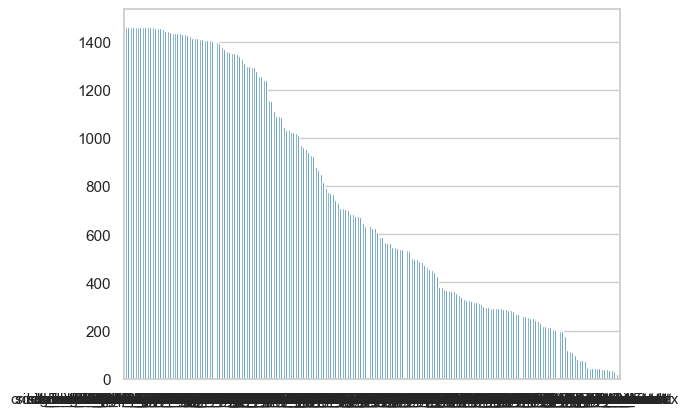

In [103]:
# number of unique value in each column
sns.barplot(df.nunique().sort_values(ascending=False))

# Aucune données catégorielles

### Objectif : montrer que les données comportent peu d'information

In [104]:
print(f"{df.isnull().mean().mean() * 100} % des données sont manquantes")

7.710762194499458 % des données sont manquantes


In [105]:
# PCA on data
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
# Drop na
df2 = df.dropna()

# Select numeric only
numeric_cols = df2.select_dtypes(include=[np.number]).columns

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df2[numeric_cols])

# Create an instance of PCA
pca = PCA()

# Fit the PCA model to the standardized data
pca.fit(scaled_data)

# Transform the data to its principal components
reduced_data = pca.transform(scaled_data)

reduced_data.shape

(242, 200)

### Missing values

Max number of na: 972


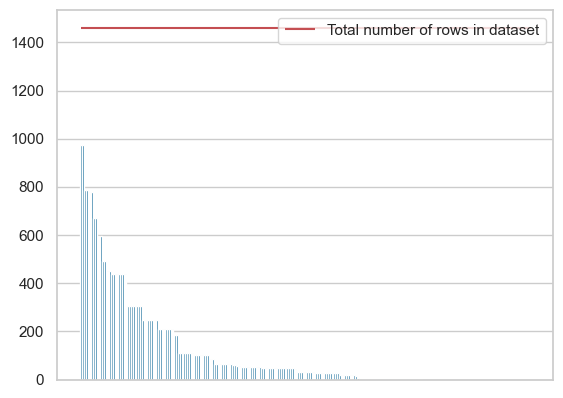

In [106]:
# Display na data for each column
df.isna().sum()
# plot using seaborn
sns.barplot(df.isna().sum().sort_values(ascending=False))
plt.xticks([])
# Show max number of na
print(f"Max number of na: {df.isna().sum().max()}")
# Show max number of na on plot
plt.hlines(df.shape[0], 0, df.shape[1], colors= 'r', label = "Total number of rows in dataset")
plt.legend()

### Confusion matrix

<Axes: >

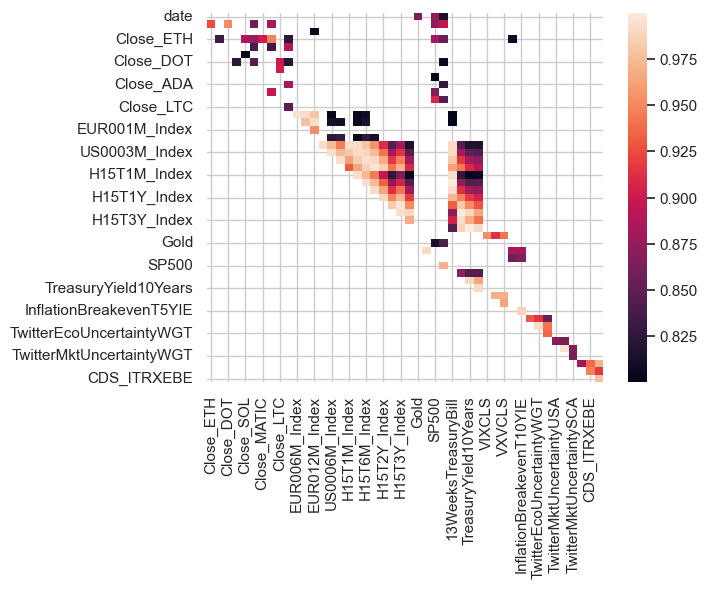

In [110]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

corr = df.corr()
# Correlation without the diagonal and only with high value of correlation
corr = corr.mask(np.tril(np.ones(corr.shape)).astype(bool))
corr = corr[corr > 0.8].dropna(axis=0, how='all').dropna(axis=1, how='all')
sns.heatmap(corr)

### Export data

In [109]:
# Export data in csv
df.to_csv("data/output_data.csv", index=False)